In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r'C:\Users\Lenovo\Documents\Data science\python\Linear regression\datasets_insurance.csv',header=0)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print(df.dtypes)
print(df.shape)
print(df.describe(include='all'))

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
(1338, 7)
                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.1

In [5]:
df.sex=df.sex.map({'female':0,'male':1})
df.smoker=df.smoker.map({'yes':1,'no':0})
df.region=df.region.map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [6]:
df.bmi=df.bmi.round(2)
df.charges=df.charges.round(2)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,1,16884.92
1,18,1,33.77,1,0,2,1725.55
2,28,1,33.00,3,0,2,4449.46
3,33,1,22.70,0,0,3,21984.47
4,32,1,28.88,0,0,3,3866.86


<AxesSubplot:>

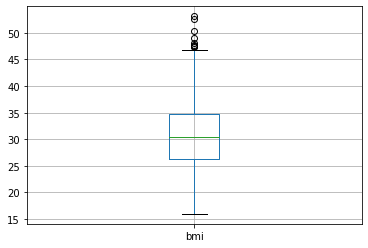

In [7]:

#outliers
df.boxplot(column='bmi') 

<AxesSubplot:>

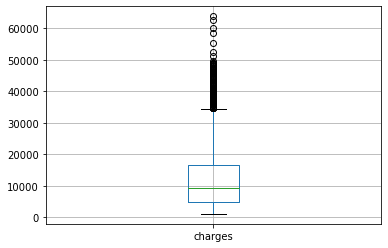

In [8]:
df.boxplot(column='charges')

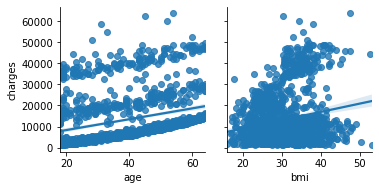

In [9]:
#linear relationship
sns.pairplot(df,x_vars=['age','bmi'],y_vars='charges',kind='reg')

In [10]:
X=df[['age','sex','bmi','children','smoker','region']]
Y=df['charges']

<AxesSubplot:xlabel='charges'>

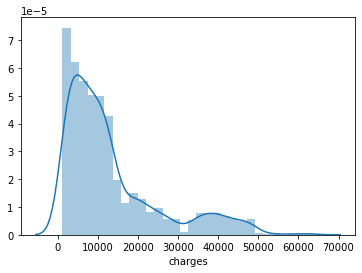

In [11]:
#dependent variable(Y) should follow a aprrox normal distribution
sns.distplot(Y,hist=True)

In [12]:
Y_log=np.log(Y)

<AxesSubplot:xlabel='charges'>

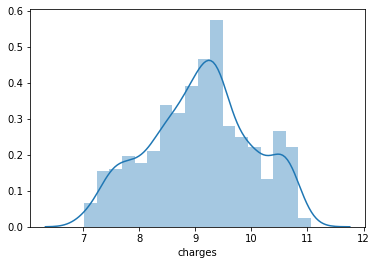

In [13]:
sns.distplot(Y_log,hist=True)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'children'}>],
       [<AxesSubplot:title={'center':'smoker'}>,
        <AxesSubplot:title={'center':'region'}>]], dtype=object)

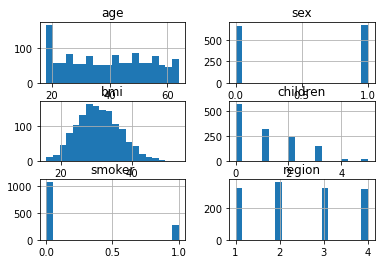

In [14]:
#treating skewness in X variables
X.hist(bins=20)

In [15]:
from scipy.stats import skew
data_num_skew = X.apply(lambda x: skew(x.dropna()))# we are using dropna to remove missing values.IF MISSING VALUES WERE ALREADY TREATED. THEN NOT REQD TO RUN DROPNA. JUST SKEW(X) SHLD  BE  ENUF.
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]

print(data_num_skew)
print(data_num_skewed)

age         0.055610
sex        -0.020928
bmi         0.283786
children    0.937328
smoker      1.463124
region      0.038058
dtype: float64
children    0.937328
smoker      1.463124
dtype: float64


               age       sex       bmi  children    smoker    region
age       1.000000 -0.020856  0.109275  0.042469 -0.025019 -0.002127
sex      -0.020856  1.000000  0.046377  0.017163  0.076185 -0.004588
bmi       0.109275  0.046377  1.000000  0.012766  0.003744 -0.157557
children  0.042469  0.017163  0.012766  1.000000  0.007673 -0.016569
smoker   -0.025019  0.076185  0.003744  0.007673  1.000000  0.002181
region   -0.002127 -0.004588 -0.157557 -0.016569  0.002181  1.000000


<AxesSubplot:>

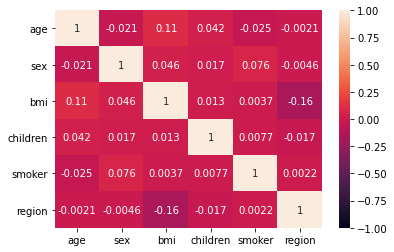

In [16]:
#multicollinearity-correlation
corr_df=X.corr(method='pearson')
print(corr_df)

sns.heatmap(corr_df,vmin=-1,vmax=1,annot=True)

In [17]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame() 
vif_df["features"] = X.columns 
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]   
vif_df.round(2)

,features,VIF Factor
0,age,7.90
1,sex,2.01
2,bmi,10.34
3,children,1.80
4,smoker,1.26
5,region,4.84


In [18]:
#spliting the data
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y_log,test_size=0.3,random_state=10)

print(Y_train)

428     8.060685
226     7.897111
867     9.356700
397     9.716344
300     8.816815
          ...   
1180    8.942562
1147    7.723815
527     9.196345
1149    8.696131
1289    8.874514
Name: charges, Length: 936, dtype: float64


In [19]:
print(X_test.shape)
print(Y_test.shape)

(402, 6)
(402,)


In [20]:
#auto-correlation and significant variables
new_df1=pd.DataFrame()
new_df1=X_train
new_df1['Premium']=Y_train

In [21]:
import statsmodels.formula.api as sm
lm_model=sm.ols(formula='Premium ~ age+ sex+ bmi+ children+ smoker+ region',data=new_df1).fit()
print(lm_model.params)
print(lm_model.summary())

Intercept    6.871307
age          0.035243
sex         -0.070182
bmi          0.011178
children     0.099427
smoker       1.568994
region       0.042786
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                Premium   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     542.9
Date:                Thu, 27 May 2021   Prob (F-statistic):          1.32e-299
Time:                        15:29:31   Log-Likelihood:                -559.06
No. Observations:                 936   AIC:                             1132.
Df Residuals:                     929   BIC:                             1166.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err         

In [22]:
X=df[['age','sex','bmi','children','smoker','region']]
Y=df['charges']

In [23]:
Y_log=np.log(Y)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X= scaler.fit_transform(X)
print(X)

[[-1.43876426 -1.0105187  -0.45336632 -0.90861367  1.97058663 -1.34390459]
 [-1.50996545  0.98959079  0.50961197 -0.07876719 -0.5074631  -0.43849455]
 [-0.79795355  0.98959079  0.38329284  1.58092576 -0.5074631  -0.43849455]
 ...
 [-1.50996545 -1.0105187   1.01488848 -0.90861367 -0.5074631  -0.43849455]
 [-1.29636188 -1.0105187  -0.79787304 -0.90861367 -0.5074631  -1.34390459]
 [ 1.55168573 -1.0105187  -0.26142687 -0.90861367  1.97058663  0.46691549]]


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test,Y_train,Y_test=train_test_split(X,Y_log,test_size=0.3,random_state=10)
print(Y_train)

428     8.060685
226     7.897111
867     9.356700
397     9.716344
300     8.816815
          ...   
1180    8.942562
1147    7.723815
527     9.196345
1149    8.696131
1289    8.874514
Name: charges, Length: 936, dtype: float64


In [26]:
X_test.shape

(402, 6)

In [27]:
from sklearn.linear_model import Ridge
lm=Ridge()
lm.fit(X_train,Y_train)

print(lm.intercept_)
print(lm.coef_)

9.096852049259512
[ 0.4944642  -0.03501858  0.06814083  0.1196985   0.63246837  0.0472034 ]


In [28]:
Y_pred=lm.predict(X_test)

In [29]:
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error
r2 =r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r2=1-(1-r2)*(len(Y_log)-1)/(len(Y_log)-(X.shape[1]-1))
print(adjusted_r2)

0.7375188569789608
0.45350948534345537
0.7367312166398129


In [30]:
new_df=pd.DataFrame(X_test,columns=['age','sex','bmi','children','smoker','region'])
new_df


,age,sex,bmi,children,smoker,region
0,-0.157143,-1.010519,-0.479614,1.580926,-0.507463,0.466915
1,-0.228344,-1.010519,-0.620698,-0.908614,-0.507463,0.466915
2,1.409283,0.989591,1.055901,-0.078767,-0.507463,-1.343905
3,1.551686,-1.010519,-0.915990,-0.908614,-0.507463,-0.438495
4,-0.726752,-1.010519,-0.760141,-0.908614,-0.507463,0.466915
...,...,...,...,...,...,...
397,0.697271,-1.010519,-1.119413,1.580926,1.970587,1.372326
398,-1.011557,-1.010519,1.748196,-0.908614,-0.507463,1.372326
399,-0.014740,0.989591,-0.121984,-0.078767,1.970587,1.372326
400,-1.367563,0.989591,0.437430,-0.908614,-0.507463,-0.438495


In [31]:
Y_actual=Y_test.reset_index()
print(Y_actual)

     index    charges
0        7   8.893094
1      999   8.569372
2     1209   9.421182
3      491  10.106963
4      625   8.225894
..     ...        ...
397    854  10.090254
398    554   9.791377
399   1278  10.019582
400    374   7.238159
401      6   9.016827

[402 rows x 2 columns]


In [33]:
Y_actual=Y_actual.drop('index',axis=1)
Y_actual

,charges
0,8.893094
1,8.569372
2,9.421182
3,10.106963
4,8.225894
...,...
397,10.090254
398,9.791377
399,10.019582
400,7.238159


In [34]:
new_df['Actual']=Y_actual
new_df.head()

,age,sex,bmi,children,smoker,region,Actual
0,-0.157143,-1.010519,-0.479614,1.580926,-0.507463,0.466915,8.893094
1,-0.228344,-1.010519,-0.620698,-0.908614,-0.507463,0.466915,8.569372
2,1.409283,0.989591,1.055901,-0.078767,-0.507463,-1.343905,9.421182
3,1.551686,-1.010519,-0.915990,-0.908614,-0.507463,-0.438495,10.106963
4,-0.726752,-1.010519,-0.760141,-0.908614,-0.507463,0.466915,8.225894


In [35]:
Y_predicted=pd.Series(Y_pred)
Y_predicted

0       8.912176
1       8.569362
2       9.437169
3       9.386663
4       8.313415
         ...    
397    10.901084
398     8.386248
399    10.348281
400     7.965381
401     9.051351
Length: 402, dtype: float64

In [36]:
new_df['Predicted']=Y_predicted
new_df.head()

,age,sex,bmi,children,smoker,region,Actual,Predicted
0,-0.157143,-1.010519,-0.479614,1.580926,-0.507463,0.466915,8.893094,8.912176
1,-0.228344,-1.010519,-0.620698,-0.908614,-0.507463,0.466915,8.569372,8.569362
2,1.409283,0.989591,1.055901,-0.078767,-0.507463,-1.343905,9.421182,9.437169
3,1.551686,-1.010519,-0.915990,-0.908614,-0.507463,-0.438495,10.106963,9.386663
4,-0.726752,-1.010519,-0.760141,-0.908614,-0.507463,0.466915,8.225894,8.313415


In [37]:
new_df['Deviation']=new_df.Actual-new_df.Predicted
new_df.head()

,age,sex,bmi,children,smoker,region,Actual,Predicted,Deviation
0,-0.157143,-1.010519,-0.479614,1.580926,-0.507463,0.466915,8.893094,8.912176,-0.019083
1,-0.228344,-1.010519,-0.620698,-0.908614,-0.507463,0.466915,8.569372,8.569362,0.000010
2,1.409283,0.989591,1.055901,-0.078767,-0.507463,-1.343905,9.421182,9.437169,-0.015986
3,1.551686,-1.010519,-0.915990,-0.908614,-0.507463,-0.438495,10.106963,9.386663,0.720299
4,-0.726752,-1.010519,-0.760141,-0.908614,-0.507463,0.466915,8.225894,8.313415,-0.087521


In [38]:
new_df.to_excel(r'C:\Users\Lenovo\Documents\Data science\python\Linear regression\Insurance_data.xlsx',header=True,index=True)

Text(0, 0.5, 'Residuals')

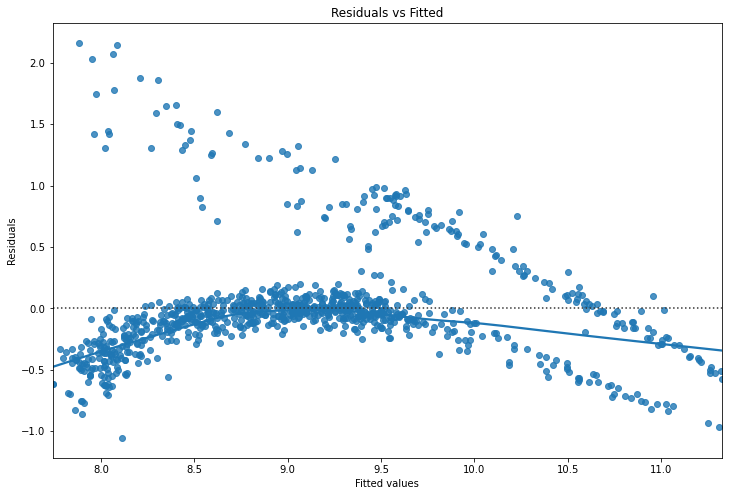

In [39]:
#assumption-1 -  the error pattern is random . it shld not follow  pattern.
import matplotlib.pyplot as plt
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

# fitted values (need a constant term for intercept)
model_fitted_y = lm_model.fittedvalues

plot_lm_1.axes[0] = sns.residplot(model_fitted_y,'Premium', data=new_df1, lowess=True)

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

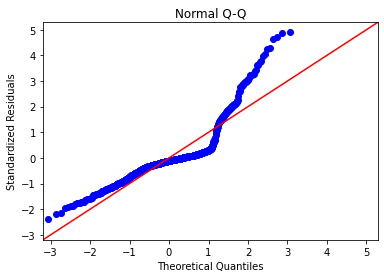

In [40]:
#assumption-2- the errors will b normally distributed
res = lm_model.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res, fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()

Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

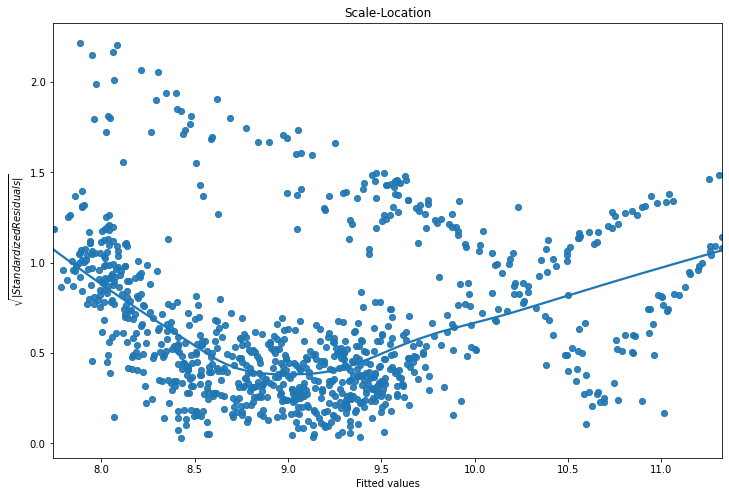

In [41]:
#ASSUMPTION-3 - ERRORS SHLD  HAVE  HOMOSKADACITY. 
model_norm_residuals = lm_model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True)


plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')